In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
df = pd.read_csv("student_habits_performance_cleaned.csv")


In [5]:
df.head(10) #Show dataview

,Student_ID,Age,Gender,Study_Hrs/day,SocialMedia_Hrs,Netflix_Hrs,PartTime_Job,Attendance_Percentage,Sleep_Hrs,Diet_Quality,Exercise_Frequency,Parental_Education_Level,Internet_Quality,Mental_Health_Rating,Extracurricular_Participation,Exam_Score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0
6,S1006,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,2,Master,Poor,4,No,89.8
7,S1007,21,Female,4.3,1.0,2.0,Yes,77.7,4.6,Fair,0,Bachelor,Average,8,No,72.6
8,S1008,23,Female,4.4,2.2,1.7,No,100.0,7.1,Good,3,Bachelor,Good,1,No,78.9
9,S1009,18,Female,4.8,3.1,1.3,No,95.4,7.5,Good,5,Bachelor,Good,10,Yes,100.0


In [6]:
df.shape #rows and columns

(1000, 16)

In [7]:
df.info() #data types and not null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Student_ID                     1000 non-null   object 
 1   Age                            1000 non-null   int64  
 2   Gender                         1000 non-null   object 
 3   Study_Hrs/day                  1000 non-null   float64
 4   SocialMedia_Hrs                1000 non-null   float64
 5   Netflix_Hrs                    1000 non-null   float64
 6   PartTime_Job                   1000 non-null   object 
 7   Attendance_Percentage          1000 non-null   float64
 8   Sleep_Hrs                      1000 non-null   float64
 9   Diet_Quality                   1000 non-null   object 
 10  Exercise_Frequency             1000 non-null   int64  
 11  Parental_Education_Level       909 non-null    object 
 12  Internet_Quality               1000 non-null   ob

In [8]:
df['Parental_Education_Level'].unique()


array(['Master', 'High School', 'Bachelor', nan], dtype=object)

In [9]:
df['Parental_Education_Level'].isna().sum()


91

In [10]:
df['Parental_Education_Level'] = df['Parental_Education_Level'].fillna('Unknown')          
#replace none to unknown 


In [11]:
df['Parental_Education_Level'].unique()


array(['Master', 'High School', 'Bachelor', 'Unknown'], dtype=object)

In [12]:
df.duplicated().sum()

0

In [13]:
print(df.columns.tolist())


['Student_ID', 'Age', 'Gender', 'Study_Hrs/day', 'SocialMedia_Hrs', 'Netflix_Hrs', 'PartTime_Job', 'Attendance_Percentage', 'Sleep_Hrs', 'Diet_Quality', 'Exercise_Frequency', 'Parental_Education_Level', 'Internet_Quality', 'Mental_Health_Rating', 'Extracurricular_Participation', 'Exam_Score']


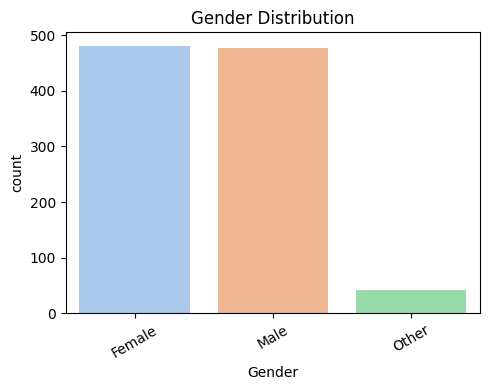

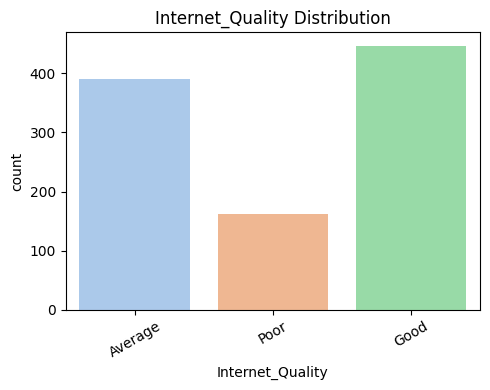

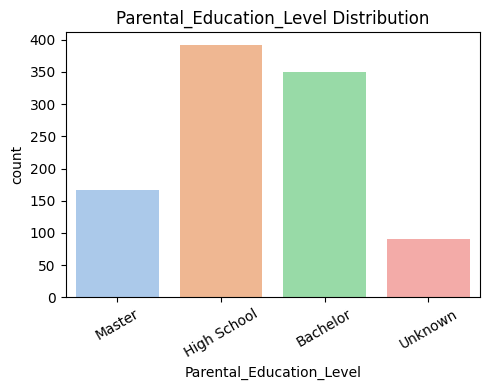

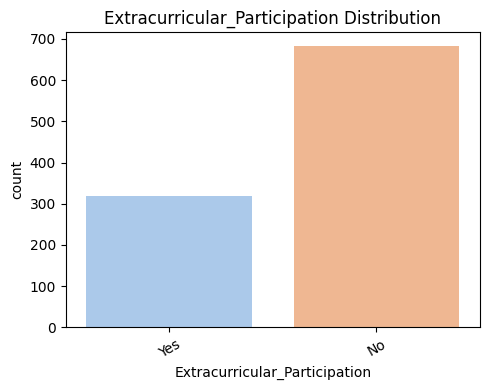

In [14]:
categorical_cols = ['Gender', 'Internet_Quality', 'Parental_Education_Level', 'Extracurricular_Participation']

for col in categorical_cols:
    plt.figure(figsize=(5, 4))
    sns.countplot(x=col, hue=col, data=df, palette='pastel')
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

In [15]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Summary statistics
print(df[numerical_cols].describe())


             Age  Study_Hrs/day  SocialMedia_Hrs  Netflix_Hrs  \
count  1000.0000     1000.00000      1000.000000  1000.000000   
mean     20.4980        3.55010         2.505500     1.819700   
std       2.3081        1.46889         1.172422     1.075118   
min      17.0000        0.00000         0.000000     0.000000   
25%      18.7500        2.60000         1.700000     1.000000   
50%      20.0000        3.50000         2.500000     1.800000   
75%      23.0000        4.50000         3.300000     2.525000   
max      24.0000        8.30000         7.200000     5.400000   

       Attendance_Percentage    Sleep_Hrs  Exercise_Frequency  \
count            1000.000000  1000.000000         1000.000000   
mean               84.131700     6.470100            3.042000   
std                 9.399246     1.226377            2.025423   
min                56.000000     3.200000            0.000000   
25%                78.000000     5.600000            1.000000   
50%                84.40

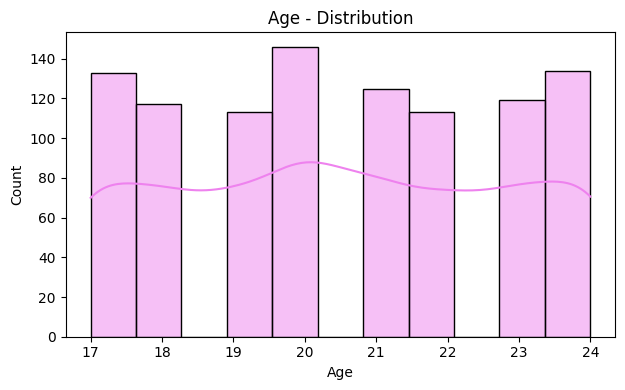

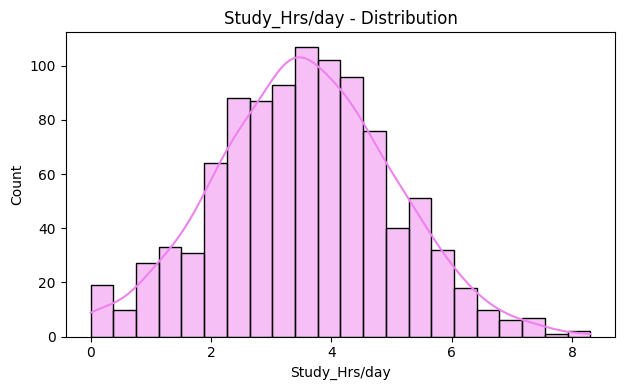

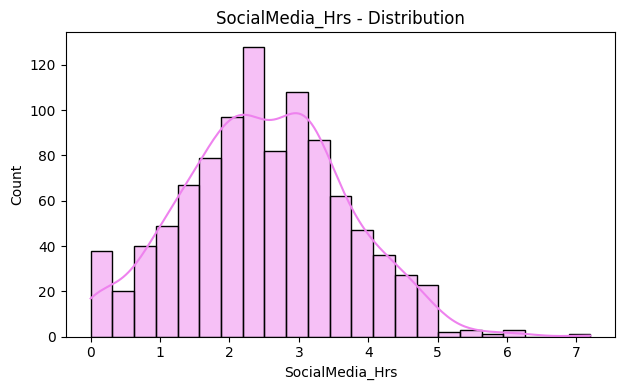

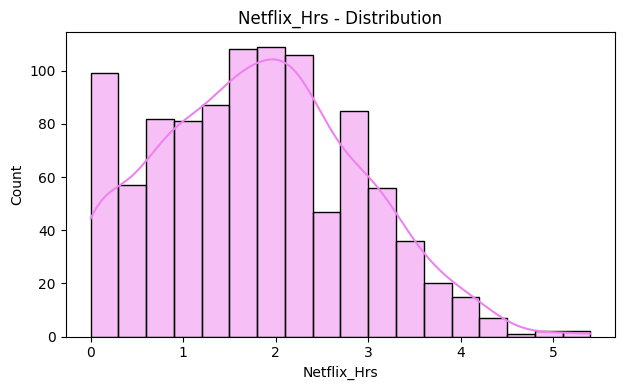

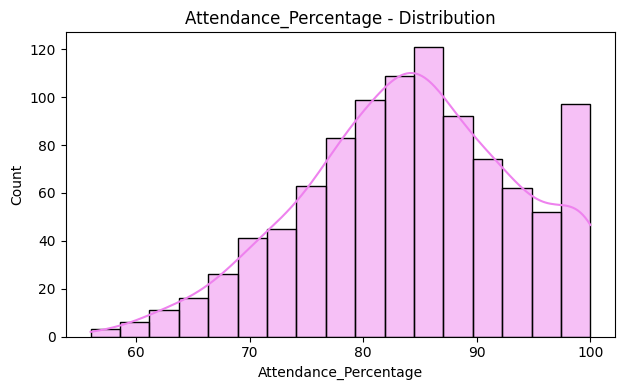

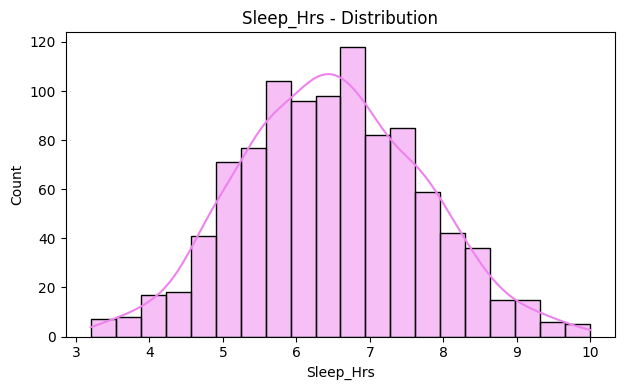

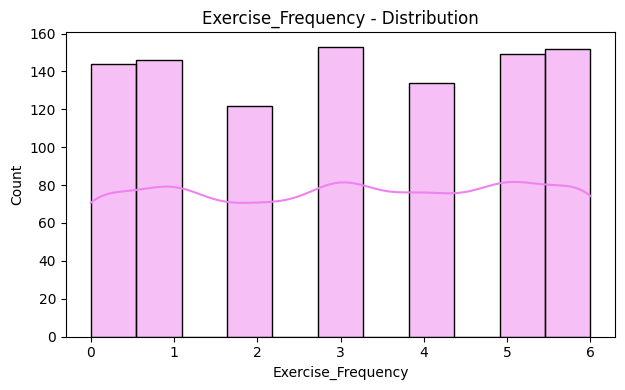

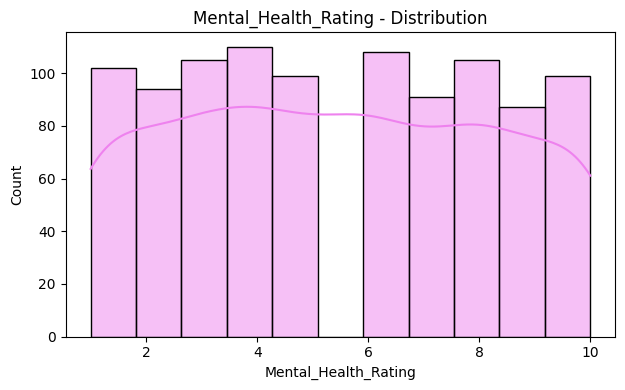

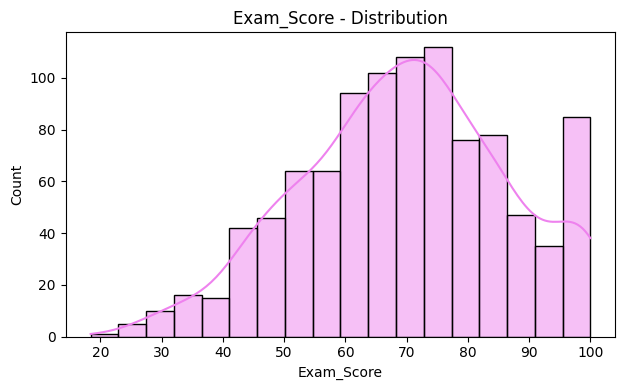

In [16]:
for col in numerical_cols:
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='violet')
    plt.title(f'{col} - Distribution')
    plt.tight_layout()
    plt.show()

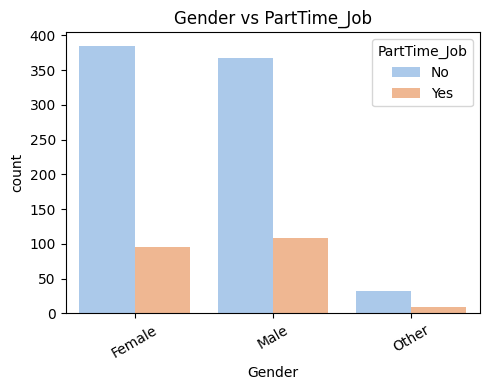

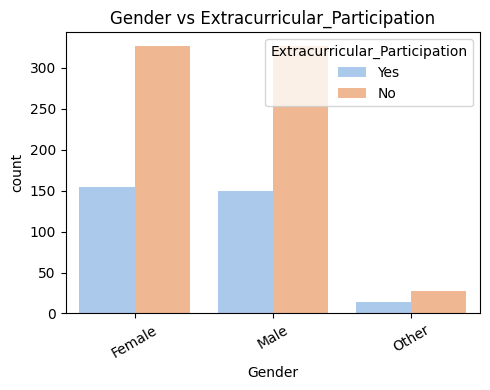

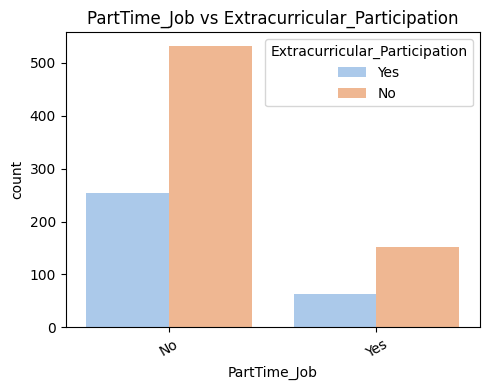

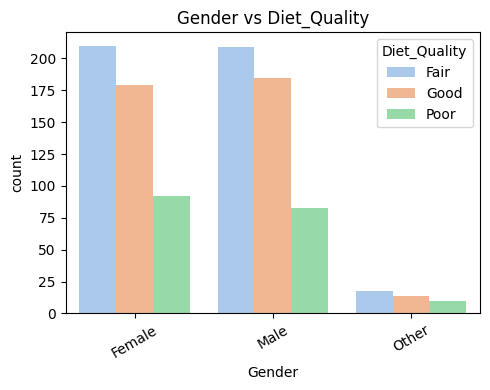

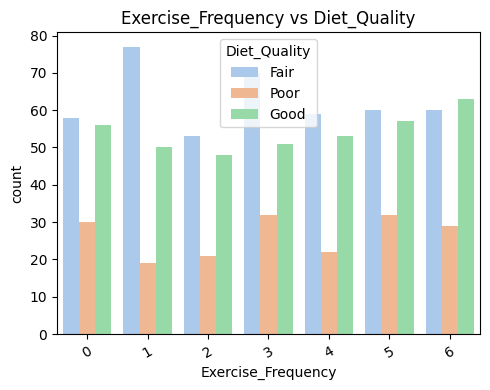

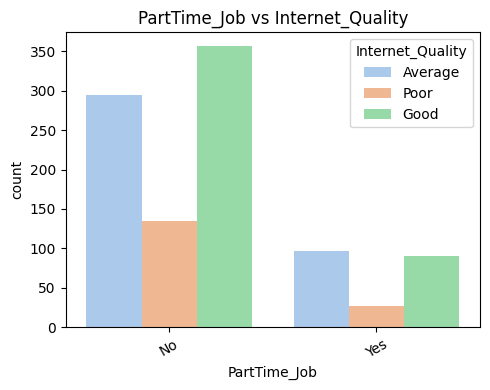

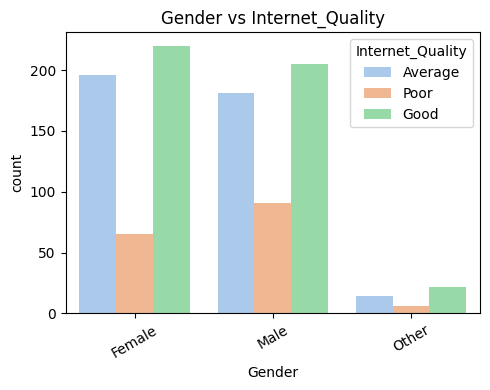

In [17]:
#pairs by category 
cat_pairs = [
    ('Gender', 'PartTime_Job'),
    ('Gender', 'Extracurricular_Participation'),
    ('PartTime_Job', 'Extracurricular_Participation'),
    ('Gender', 'Diet_Quality'),
    ('Exercise_Frequency', 'Diet_Quality'),
    ('PartTime_Job', 'Internet_Quality'),
    ('Gender', 'Internet_Quality')
]

# Plot
for col1, col2 in cat_pairs:
    plt.figure(figsize=(5, 4))
    sns.countplot(data=df, x=col1, hue=col2, palette='pastel')
    plt.title(f'{col1} vs {col2}')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


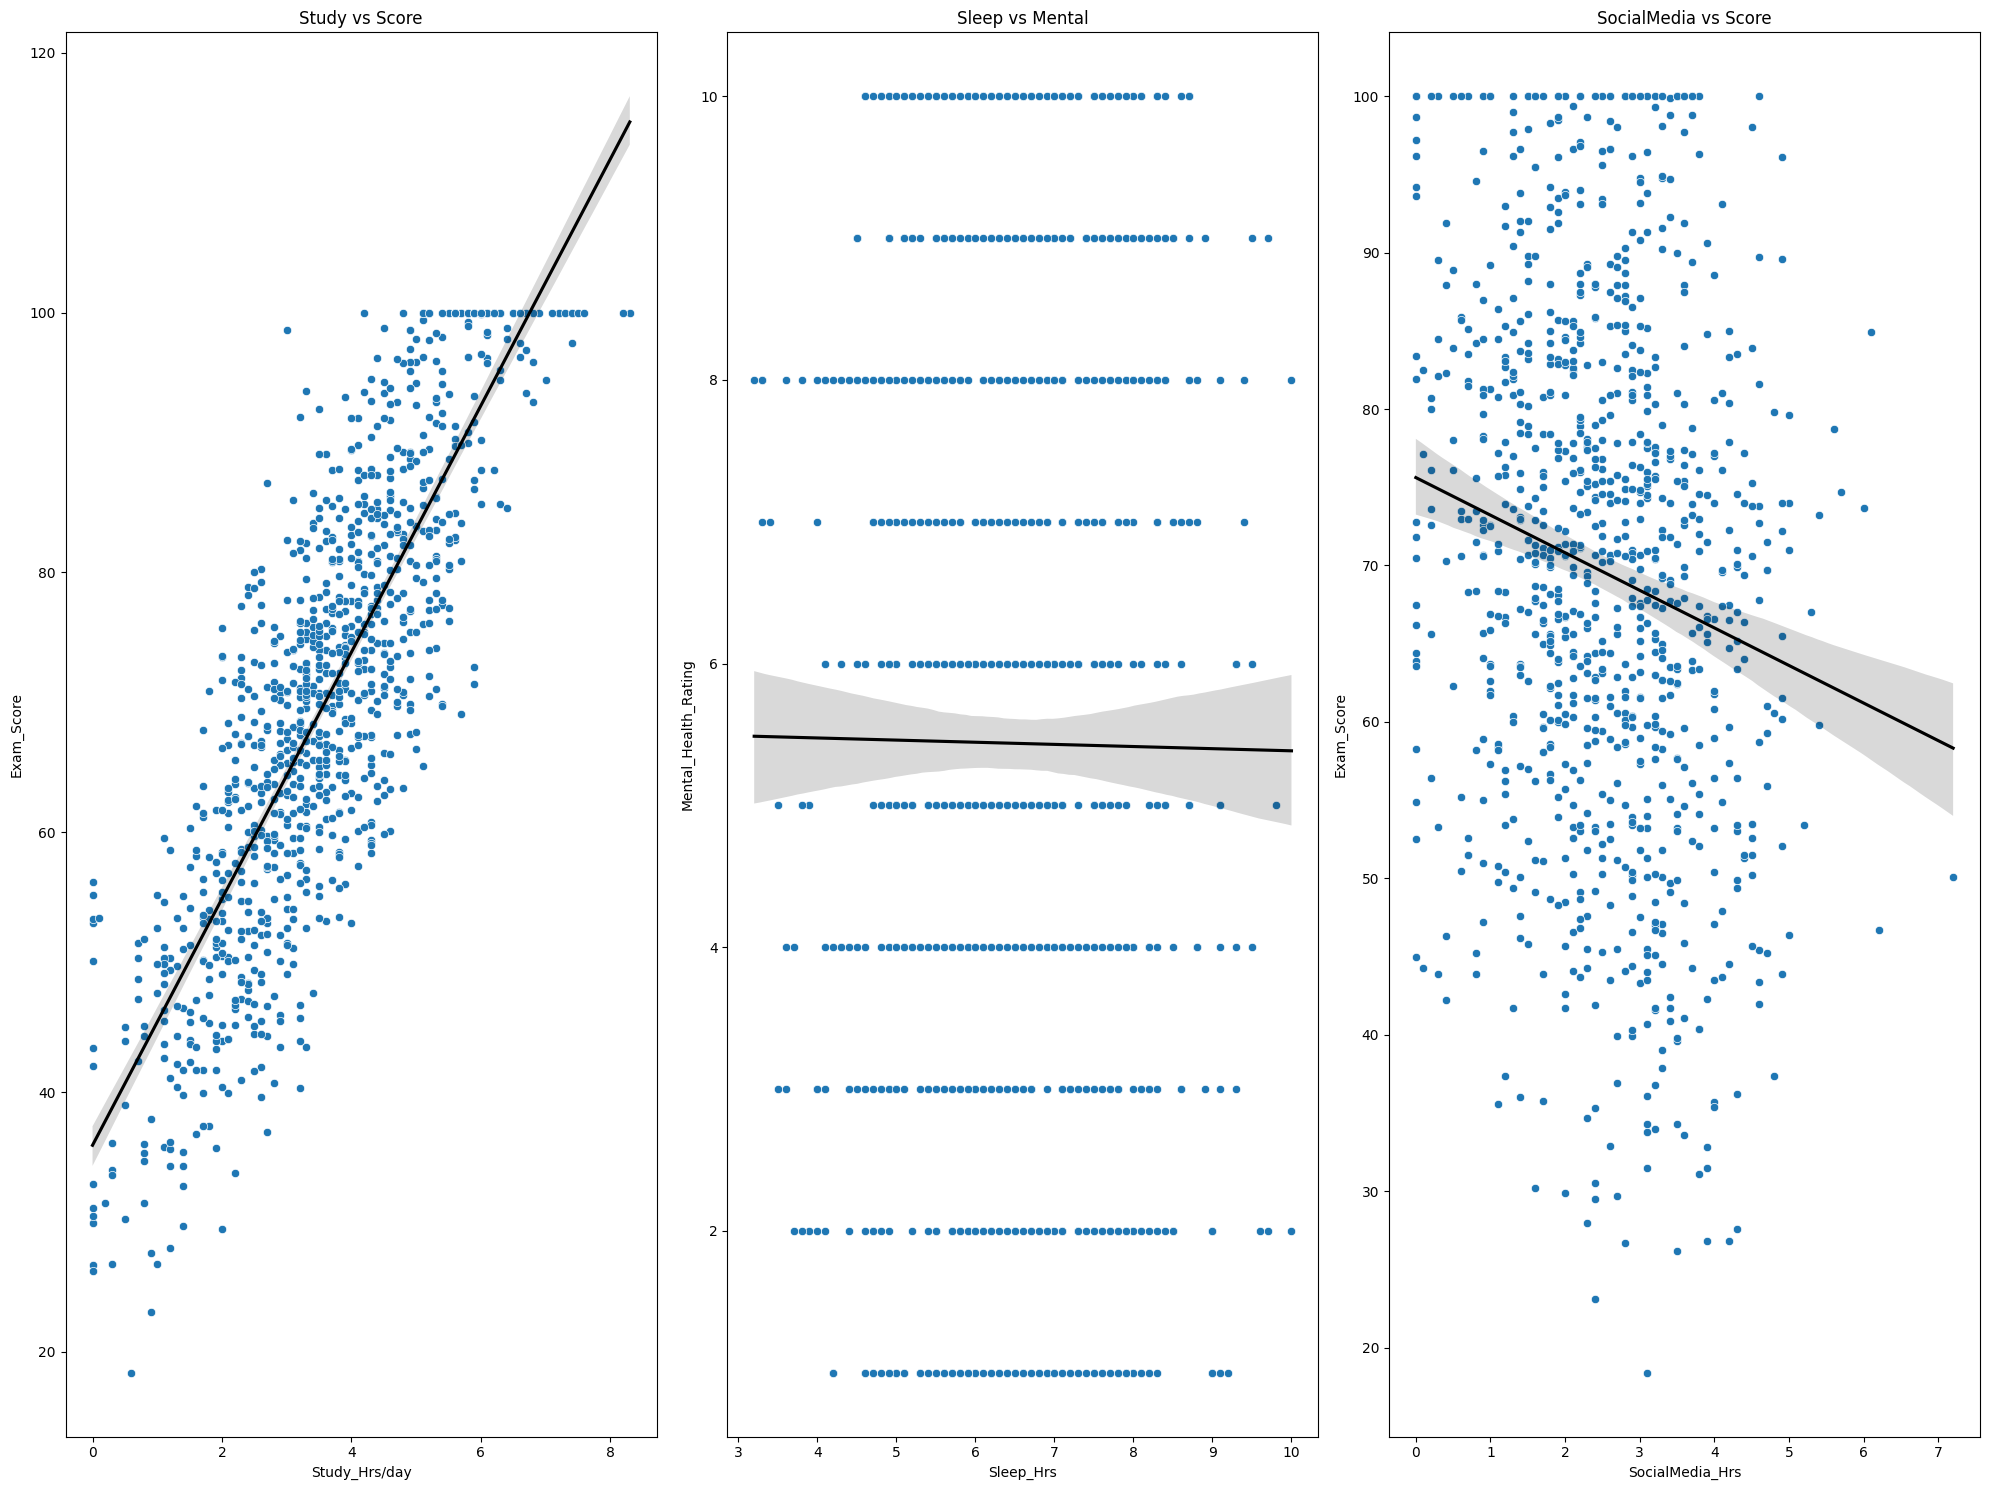

In [34]:

fig, axs = plt.subplots(1, 3, figsize=(20,15))

plots = [
    ('Study_Hrs/day', 'Exam_Score', 'Study vs Score'),
    ('Sleep_Hrs', 'Mental_Health_Rating', 'Sleep vs Mental'),
    ('SocialMedia_Hrs', 'Exam_Score', 'SocialMedia vs Score')
]

for i, (x, y, title) in enumerate(plots):
    sns.scatterplot(data=df, x=x, y=y, ax=axs[i])
    sns.regplot(data=df, x=x, y=y, scatter=False, ax=axs[i], color='black')
    axs[i].set_title(title)

plt.tight_layout()
plt.show()

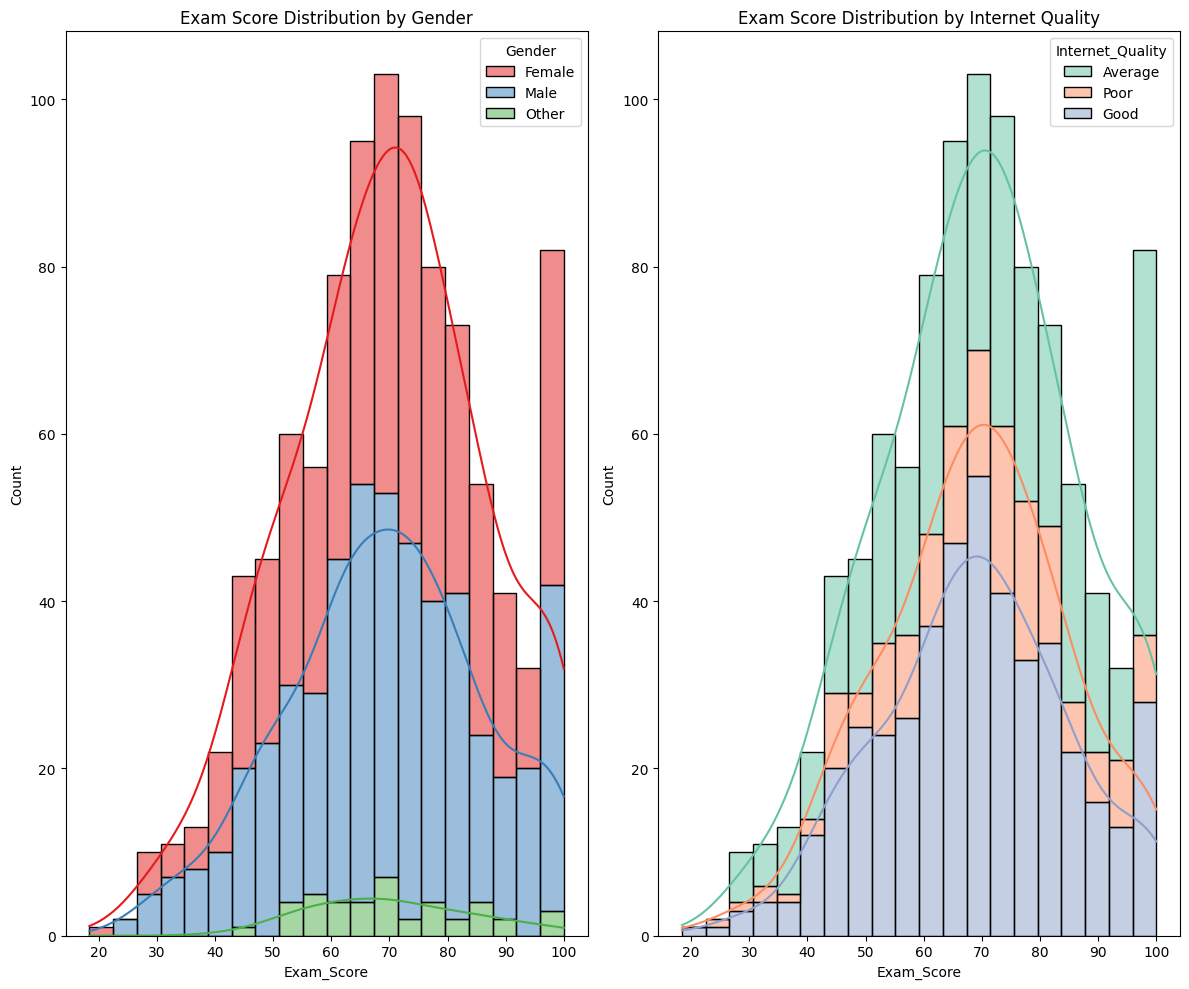

In [41]:
plt.figure(figsize=(12,10))

# Histogram: Exam Score distribution by Gender
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Exam_Score', hue='Gender', bins=20, kde=True, palette='Set1', multiple='stack')
plt.title('Exam Score Distribution by Gender')

# Histogram: Exam Score distribution by Internet Quality
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Exam_Score', hue='Internet_Quality', bins=20, kde=True, palette='Set2', multiple='stack')
plt.title('Exam Score Distribution by Internet Quality')

plt.tight_layout()
plt.show()

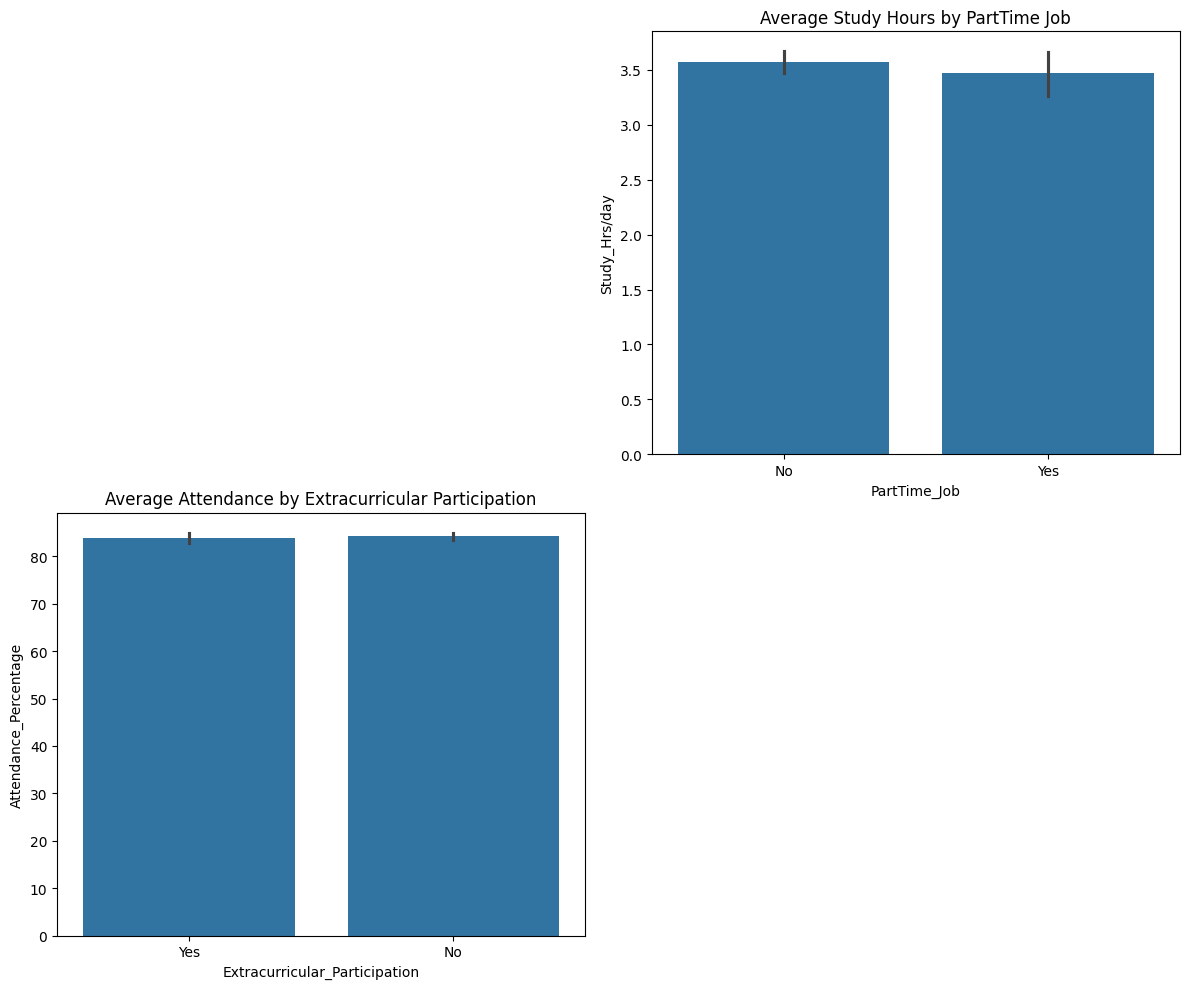

In [43]:
plt.figure(figsize=(12,10))

# Bar Plot: PartTime_Job vs Study_Hrs/day
plt.subplot(2, 2, 2)
sns.barplot(data=df, x='PartTime_Job', y='Study_Hrs/day')
plt.title('Average Study Hours by PartTime Job')

# Bar Plot: Extracurricular_Participation vs Attendance_Percentage
plt.subplot(2, 2, 3)
sns.barplot(data=df, x='Extracurricular_Participation', y='Attendance_Percentage')
plt.title('Average Attendance by Extracurricular Participation')

plt.tight_layout()
plt.show()

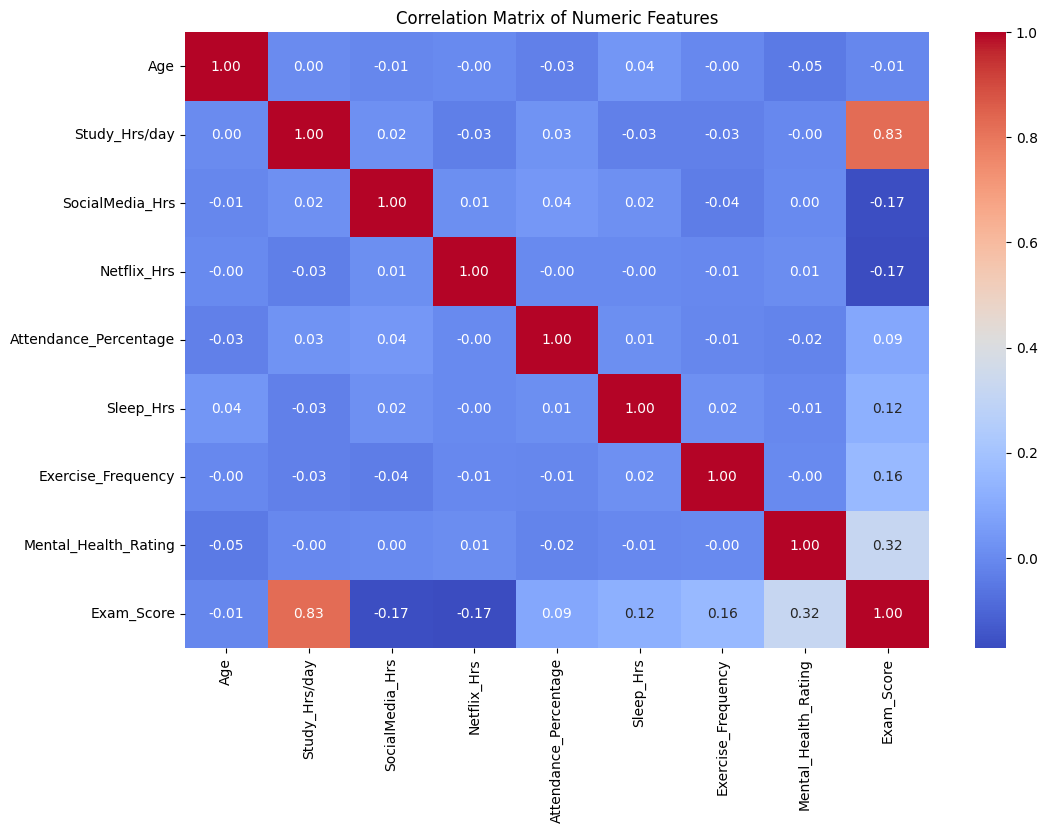

In [45]:
# Correlation matrix 
corr_matrix = df[numerical_cols].corr()

# Heatmap 
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [46]:
# Total Screen Time 
df['Total_Screen_Time'] = df['SocialMedia_Hrs'] + df['Netflix_Hrs']

# Study Efficiency 
df['Study_Efficiency'] = df.apply(lambda x: x['Exam_Score'] / x['Study_Hrs/day'] if x['Study_Hrs/day'] > 0 else 0, axis=1)


In [47]:
print(df[['SocialMedia_Hrs', 'Netflix_Hrs', 'Total_Screen_Time', 'Study_Hrs/day', 'Exam_Score', 'Study_Efficiency']].head())


   SocialMedia_Hrs  Netflix_Hrs  Total_Screen_Time  Study_Hrs/day  Exam_Score  \
0              1.2          1.1                2.3            0.0        56.2   
1              2.8          2.3                5.1            6.9       100.0   
2              3.1          1.3                4.4            1.4        34.3   
3              3.9          1.0                4.9            1.0        26.8   
4              4.4          0.5                4.9            5.0        66.4   

   Study_Efficiency  
0          0.000000  
1         14.492754  
2         24.500000  
3         26.800000  
4         13.280000  
